In [86]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
import os

# Import API key
from api_keys import weather_api_key

from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [87]:
#Read csv file
cities_file="../Resources/cities.csv"
cities_data = pd.read_csv(cities_file)
cities_list = cities_data["City"].unique()

cities_list

array(['ostrovnoy', 'mahebourg', 'qaanaaq', 'zhuhai', 'cape town',
       'atuona', 'flinders', 'opuwo', 'tiksi', 'pushkinskiye gory',
       'aykhal', 'castro', 'avarua', 'saskylakh', 'constitucion',
       'albany', 'vilyuysk', 'ushuaia', 'bambous virieux', 'kodinsk',
       'teknaf', 'busselton', 'ambon', 'maragogi', 'fallon', 'kantang',
       'colonelganj', 'punta arenas', 'rikitea', 'new norfolk', 'gobabis',
       'qingdao', 'port hardy', 'arman', 'mamakan', 'bethel', 'clinton',
       'varhaug', 'ayan', 'mayor pablo lagerenza', 'hermanus', 'torbay',
       'yellowknife', 'kruisfontein', 'puerto ayora', 'rosita', 'beloha',
       'port elizabeth', 'port alfred', 'garchitorena', 'kodiak',
       'mar del plata', 'taybad', 'cabo san lucas', 'tiarei', 'khatanga',
       'pisco', 'kolyvan', 'hofn', 'bontang', 'sault sainte marie',
       'zhigansk', 'thompson', 'pevek', 'nanortalik', 'bilibino',
       'dikson', 'hambantota', 'beja', 'fortuna', 'ponta do sol',
       'qasigiannguit'

In [88]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



606

In [89]:
#Build query url and get response
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
response

{'cod': '404', 'message': 'city not found'}

In [66]:
#Lists and counters
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [67]:
print("Beginning Data Retrieval ")
print("-------------------------------")

# base_url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"
# query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 48:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : sao gabriel da cachoeira
Processing Record 2 of Set 1 : atuona
Processing Record 3 of Set 1 : new norfolk
Processing Record 4 of Set 1 : nikolskoye
Processing Record 5 of Set 1 : bredasdorp
Processing Record 6 of Set 1 : taicheng
Processing Record 7 of Set 1 : coahuayana
Processing Record 8 of Set 1 : rio de janeiro
Processing Record 9 of Set 1 : hermanus
Processing Record 10 of Set 1 : cap malheureux
Processing Record 11 of Set 1 : mataura
Processing Record 12 of Set 1 : college
Processing Record 13 of Set 1 : ilulissat
Processing Record 14 of Set 1 : vaini
Processing Record 15 of Set 1 : puerto ayora
Processing Record 16 of Set 1 : ushuaia
Processing Record 17 of Set 1 : busselton
Processing Record 18 of Set 1 : neuquen
Processing Record 19 of Set 1 : verkhnyaya inta
Processing Record 20 of Set 1 : clyde river
Processing Record 21 of Set 1 : arlit
Processing Record 22 of Set 1 : kavieng
Processin

In [90]:
#Creating a Dataframe
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})
weather_data.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Clouds        569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [91]:
#Export dataframe into a .csv
weather_data.to_csv(index=False)
#Display the dataframe
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,São Gabriel da Cachoeira,-0.1303,-67.0892,70.77,98,63,1.63,BR,1626926456
1,Atuona,-9.8000,-139.0333,77.47,67,34,14.03,PF,1626926748
2,New Norfolk,-42.7826,147.0587,57.70,55,99,4.00,AU,1626926749
3,Nikolskoye,59.7035,30.7861,59.02,66,59,6.42,RU,1626926749
4,Bredasdorp,-34.5322,20.0403,40.28,89,69,7.18,ZA,1626926749


In [92]:
#Summary Statistics
weather_data
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Date
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02
mean,18.790126,19.464166,69.449420,70.226714,53.892794,7.796538,1.626927e+09
std,33.216171,90.492793,14.129391,20.066955,39.248003,5.737785,8.629929e+01
min,-54.800000,-179.166700,27.340000,13.000000,0.000000,0.000000,1.626926e+09
25%,-8.926600,-59.533300,59.950000,58.000000,10.000000,3.760000,1.626927e+09
50%,20.790300,23.541400,71.280000,74.000000,60.000000,6.440000,1.626927e+09
75%,47.674000,102.265500,80.440000,86.000000,96.000000,10.360000,1.626927e+09
max,78.218600,179.316700,96.400000,100.000000,100.000000,30.940000,1.626927e+09


In [93]:
#Inspect the data and remove the cities which have humidity>100%
humidity_less = weather_data[weather_data['Humidity'] < 100]
humidity_less.describe()

,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Date
count,563.000000,563.000000,563.000000,563.000000,563.000000,563.000000,5.630000e+02
mean,18.841247,19.626880,69.519059,69.909414,53.788632,7.807478,1.626927e+09
std,33.156743,90.734172,14.106920,19.935322,39.376544,5.706384,8.625141e+01
min,-54.800000,-179.166700,27.340000,13.000000,0.000000,0.000000,1.626926e+09
25%,-8.696650,-60.208200,59.935000,58.000000,10.000000,3.790000,1.626927e+09
50%,20.750000,24.483300,71.370000,74.000000,59.000000,6.510000,1.626927e+09
75%,47.953250,102.272600,80.520000,86.000000,96.000000,10.360000,1.626927e+09
max,78.218600,179.316700,96.400000,99.000000,100.000000,30.940000,1.626927e+09


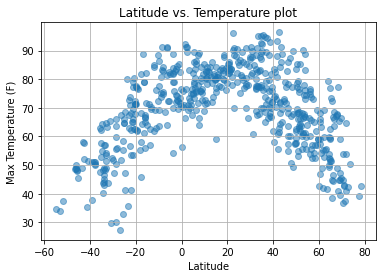

<Figure size 432x288 with 0 Axes>

In [94]:
#Plotting the data
# Use proper labelling of the plot using plot titles,including data of analysis and axes labels
#Latitude vs. Temperature plot
plt.scatter(weather_data['Lat'], weather_data['Max Temp'], alpha=0.5)
plt.title("Latitude vs. Temperature plot")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("Images/Latitude vs Max Temperature.png")

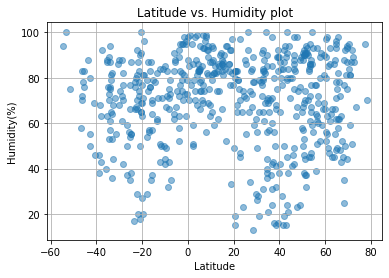

<Figure size 432x288 with 0 Axes>

In [95]:
#Latitude vs. Humidity plot
plt.scatter(weather_data['Lat'], weather_data['Humidity'], alpha=0.5)
plt.title("Latitude vs. Humidity plot")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("Images/Latitude vs Humidity.png")

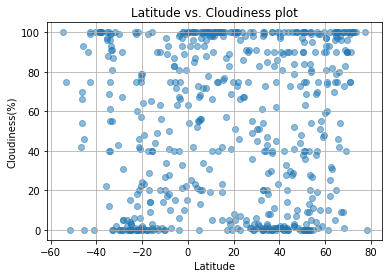

<Figure size 432x288 with 0 Axes>

In [96]:
#Latitude vs. Cloudiness plot
plt.scatter(weather_data['Lat'], weather_data['Clouds'], alpha=0.5)
plt.title("Latitude vs. Cloudiness plot")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("Images/Latitude vs Clouds.png")

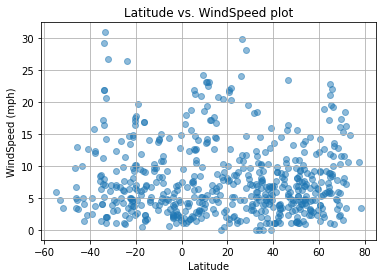

<Figure size 432x288 with 0 Axes>

In [97]:
#Latitude vs. WindSpeed plot
plt.scatter(weather_data['Lat'], weather_data['Wind Speed'], alpha=0.5)
plt.title("Latitude vs. WindSpeed plot")
plt.ylabel("WindSpeed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
plt.savefig("Images/Latitude vs Wind Speed.png")

In [99]:
###Linear Regression
#Northern Hemisphere - Temperature (F) vs. Latitude
northern_hemis= weather_data[weather_data['Lat']>=0]
northern_hemis
plt.scatter(northern_hemis['Lat'], northern_hemis['Max Temp'], alpha=0.5)
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.show()
#linear regression model
slope, intercept, rvalue, pvalue,std_err = st.linregress(Lat,Max Temp )


#create equation of line
line = slope * wt + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}" 
print(line_eq)

# #plot linear model on top of scatter plot
# fig, ax = plt.subplots(figsize=(7,7))
# ax.set_autoscale_on(True)
# ax.scatter(wt, vol, marker="*", facecolors="green", edgecolors="green")
# ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")

# plt.plot(wt, line, 'b-')
# plt.title("Average Tumor Volume (mm3) v Mouse Weight (g)")
# plt.ylabel("Avg Tumor Volume (mm3)")
# plt.xlabel("Mouse Weight (g)")
# plt.ylim(vol.min() - 1, vol.max() + 1)
# plt.xlim(wt.min() - 1, wt.max() + 1)
# plt.annotate(line_eq, (20,35), fontsize=12, color="red")
# plt.show()

SyntaxError: invalid syntax (<ipython-input-99-264c3e69ca54>, line 12)